Name of the Intern : Tejas Vidyadhar Kudalkar

Internship Project Name - Customer Churn Prediction Using Machine Learning

Company Name - CodSoft

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:\\Users\\Dell\\Downloads\\Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset = dataset.drop(columns = ['RowNumber','CustomerId','Surname'])

In [6]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# One hot encoding

In [10]:
dataset = pd.get_dummies(data = dataset,drop_first = True)

In [11]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<AxesSubplot: ylabel='Frequency'>

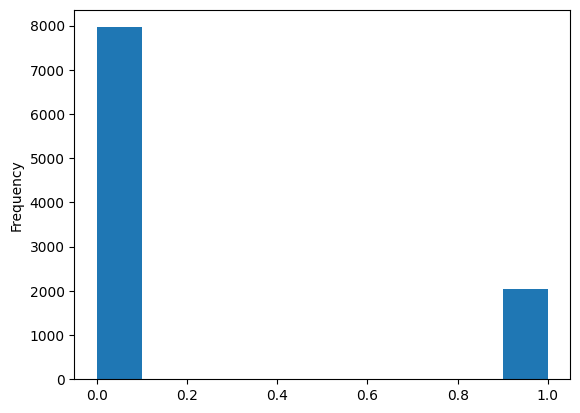

In [12]:
dataset.Exited.plot.hist()

In [13]:
(dataset.Exited==0).sum()

7963

In [14]:
(dataset.Exited==1).sum()

2037

In [15]:
x = dataset.drop(columns =['Exited'])
y = dataset['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [16]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
x_train.shape

(8000, 11)

In [19]:
y_train.shape

(8000,)

In [20]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train_scaled,y_train)

In [23]:
y_pred = clf.predict(x_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [25]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [26]:
result = pd.DataFrame([['Logistic Regression',acc,conf,f1,prec,recall]],columns = ['Model','acc','conf','f1','prec','recall'])

In [27]:
result

,Model,acc,conf,f1,prec,recall
0,Logistic Regression,0.811,"[[1526, 69], [309, 96]]",0.336842,0.581818,0.237037


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=0)
clf_gb.fit(x_train_scaled, y_train)

# Make predictions using the trained model
y_pred_gb = clf_gb.predict(x_test_scaled)

# Calculate the metrics for the GradientBoostingClassifier
acc_gb = accuracy_score(y_test, y_pred_gb)
conf_gb = confusion_matrix(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

# Create a DataFrame to store the results of the GradientBoostingClassifier
gb_result = pd.DataFrame([['GradientBoostingClassifier', acc_gb, conf_gb, f1_gb, prec_gb, recall_gb]],
                         columns=['Model', 'acc', 'conf', 'f1', 'prec', 'recall'])

# Append the results to the existing DataFrame
result = result.append(gb_result, ignore_index=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17024\1530228444.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(gb_result, ignore_index=True)


In [29]:
result

,Model,acc,conf,f1,prec,recall
0,Logistic Regression,0.811,"[[1526, 69], [309, 96]]",0.336842,0.581818,0.237037
1,GradientBoostingClassifier,0.867,"[[1523, 72], [194, 211]]",0.613372,0.745583,0.520988


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Create and train the Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(x_train_scaled, y_train)

# Make predictions using the trained model
y_pred_rf = clf_rf.predict(x_test_scaled)

# Calculate the metrics for the Random Forest Classifier
acc_rf = accuracy_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Create a DataFrame to store the results of the Random Forest Classifier
rf_result = pd.DataFrame([['RandomForestClassifier', acc_rf, conf_rf, f1_rf, prec_rf, recall_rf]],
                         columns=['Model', 'acc', 'conf', 'f1', 'prec', 'recall'])

# Check if 'result' DataFrame already exists, if not, create it
try:
    result  # Try accessing 'result'
except NameError:
    result = pd.DataFrame(columns=['Model', 'acc', 'conf', 'f1', 'prec', 'recall'])

# Append the results to the existing DataFrame
result = result.append(rf_result, ignore_index=True)

# Now 'result' contains the results from the Random Forest Classifier and potentially any other models you add


C:\Users\Dell\AppData\Local\Temp\ipykernel_17024\3283121621.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(rf_result, ignore_index=True)


In [31]:
result

,Model,acc,conf,f1,prec,recall
0,Logistic Regression,0.811,"[[1526, 69], [309, 96]]",0.336842,0.581818,0.237037
1,GradientBoostingClassifier,0.867,"[[1523, 72], [194, 211]]",0.613372,0.745583,0.520988
2,RandomForestClassifier,0.869,"[[1525, 70], [192, 213]]",0.619186,0.752650,0.525926


The Random Forest Classifier has the highest accuracy score of 0.869. Therefore, if accuracy is your primary concern, the Random Forest model might seem like the best choice.